# Polynomial Regression | Supervised Learning

# Dataset | Manufacturing 

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Importing Dataset

In [2]:
manufacturing = pd.read_csv("manufacturing.csv")
manufacturing.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [3]:
manufacturing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [4]:
manufacturing.describe().round(2)

,Number of Units,Manufacturing Cost
count,1000.00,1000.00
mean,4.47,40.05
std,1.34,10.60
min,1.00,20.00
25%,3.59,32.91
50%,4.44,38.35
75%,5.32,44.53
max,10.00,100.00


### Exploring Data

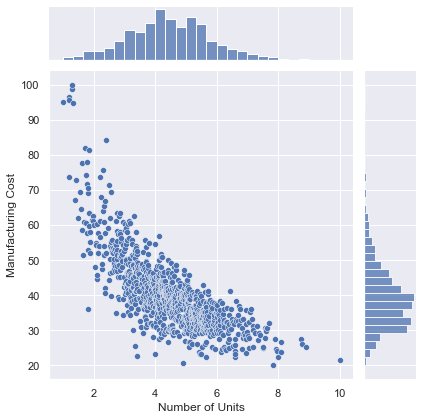

In [5]:
sns.jointplot(data = manufacturing, x='Number of Units' , y='Manufacturing Cost' )

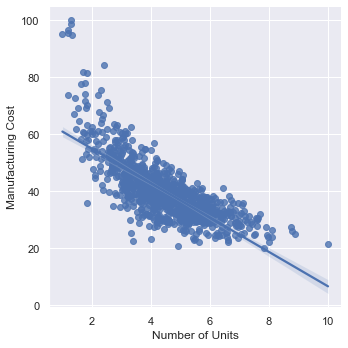

In [6]:
sns.lmplot(data = manufacturing, x='Number of Units' , y='Manufacturing Cost')

### Splitting & Scaling  Data

In [7]:
X = manufacturing[['Number of Units']]
y = manufacturing['Manufacturing Cost']

### Model Training & Building

### 1- Linear Model

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
reg = LinearRegression(fit_intercept= True)

In [10]:
reg.fit(X, y)

LinearRegression()

In [11]:
reg.coef_

array([-6.0333683])

In [12]:
reg.intercept_

67.03904193389238

Text(0.5, 1.0, 'Unit Cost VS Number Of Units')

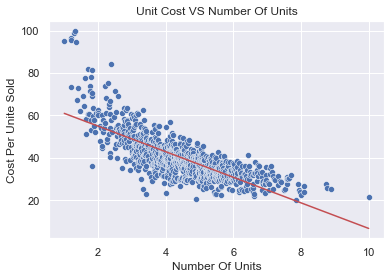

In [13]:
sns.scatterplot(data = manufacturing, x='Number of Units' , y='Manufacturing Cost')
plt.plot(X, reg.predict(X), c='r')
plt.ylabel('Cost Per Unite Sold')
plt.xlabel('Number Of Units')
plt.title('Unit Cost VS Number Of Units')

### 2- Polynomial Model

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree= 4)

In [16]:
X_poly = poly.fit_transform(X)

In [17]:
reg_poly = LinearRegression()

In [18]:
reg_poly.fit(X_poly, y)

LinearRegression()

In [19]:
reg_poly.coef_

array([ 0.00000000e+00, -5.43308190e+01,  1.22452385e+01, -1.29910949e+00,
        5.12914120e-02])

In [20]:
reg_poly.intercept_

131.71715953603646

Text(0.5, 1.0, 'Unit Cost VS Number Of Units')

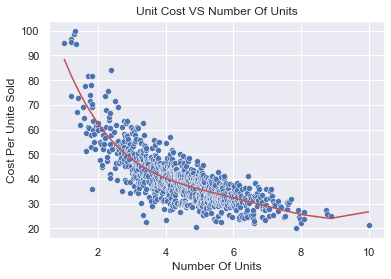

In [21]:
sns.scatterplot(data = manufacturing, x='Number of Units' , y='Manufacturing Cost')
plt.plot(X, reg_poly.predict(X_poly), c='r')
plt.ylabel('Cost Per Unite Sold')
plt.xlabel('Number Of Units')
plt.title('Unit Cost VS Number Of Units')

### Model Evaluation 

In [22]:
# Linear Model 
reg.score(X, y).round(2)

0.58

In [23]:
# Polynomial Model
reg_poly.score(X_poly, y).round(2)

0.69

# THANKS